# Flight Cancellation Prediction Model for Flyzy

## Introduction:
 Flight cancellations are a significant challenge in the aviation industry, affecting both customer satisfaction and airline profitability. Flyzy, a company dedicated to providing a seamless and hassle-free air travel experience, aims to mitigate the impact of flight cancellations through predictive modeling. By accurately predicting cancellations, Flyzy can notify customers in advance, allowing them to make alternative arrangements and reducing disruptions. Additionally, airlines can optimize their operations, improving efficiency and reducing costs associated with cancellations. This project focuses on developing a predictive model to forecast flight cancellations, ultimately supporting Flyzy's mission of enhancing the overall air travel experience for its customers and partners.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Task: Data Checking
Before developing a predictive model for flight cancellations, it is essential to ensure the dataset is clean and reliable. This task involves conducting preliminary data analysis by checking for missing values, identifying outliers, and verifying that each column has the appropriate data type. Proper handling of these issues will lead to a more accurate and robust predictive model.

In [2]:
# Load the data
df = pd.read_csv('FlyzyFlightCancellation.csv')
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [3]:
# check missing values
missing_values = ["NA","",None,np.NaN]
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


There are no missing values.

In [4]:
df.corr()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
Flight ID,1.000000,-0.007541,0.006207,-0.012384,-0.025743,-0.002007,0.006172,0.043170,0.009312,-0.009101
Flight_Distance,-0.007541,1.000000,0.039727,0.024455,0.019573,0.010139,0.018413,0.042128,-0.018627,-0.277471
Scheduled_Departure_Time,0.006207,0.039727,1.000000,-0.011834,0.018319,-0.023682,-0.036318,0.040739,0.046556,-0.043733
Day_of_Week,-0.012384,0.024455,-0.011834,1.000000,-0.016790,0.020231,0.010572,0.001148,-0.011712,-0.008705
Month,-0.025743,0.019573,0.018319,-0.016790,1.000000,-0.011544,-0.006402,0.038264,-0.003430,-0.004242
Weather_Score,-0.002007,0.010139,-0.023682,0.020231,-0.011544,1.000000,-0.043096,-0.064427,-0.005269,0.305762
Previous_Flight_Delay_Minutes,0.006172,0.018413,-0.036318,0.010572,-0.006402,-0.043096,1.000000,-0.036031,-0.069502,0.302805
Airline_Rating,0.043170,0.042128,0.040739,0.001148,0.038264,-0.064427,-0.036031,1.000000,-0.021431,-0.314099
Passenger_Load,0.009312,-0.018627,0.046556,-0.011712,-0.003430,-0.005269,-0.069502,-0.021431,1.000000,-0.008320
Flight_Cancelled,-0.009101,-0.277471,-0.043733,-0.008705,-0.004242,0.305762,0.302805,-0.314099,-0.008320,1.000000


<AxesSubplot:xlabel='Flight_Cancelled', ylabel='Flight_Distance'>

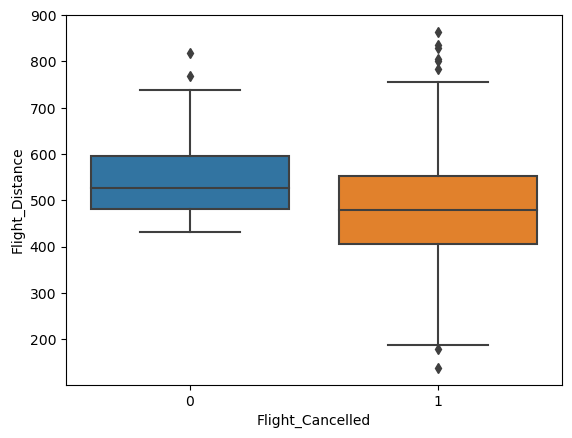

In [5]:
# identify outliers
sns.boxplot(x="Flight_Cancelled", y="Flight_Distance", data=df)

Outliers present.

<AxesSubplot:xlabel='Flight_Cancelled', ylabel='Weather_Score'>

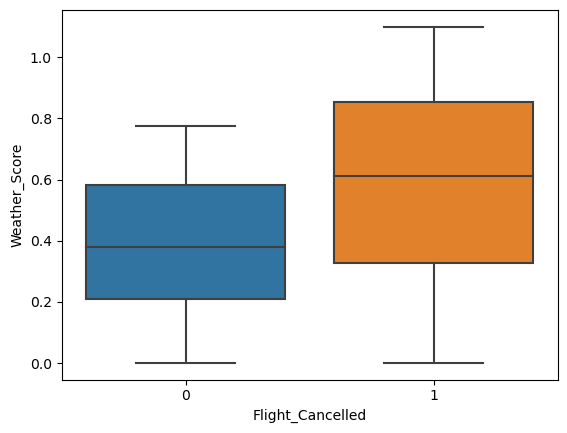

In [6]:
sns.boxplot(x="Flight_Cancelled", y="Weather_Score", data=df)

No outliers.

<AxesSubplot:xlabel='Flight_Cancelled', ylabel='Previous_Flight_Delay_Minutes'>

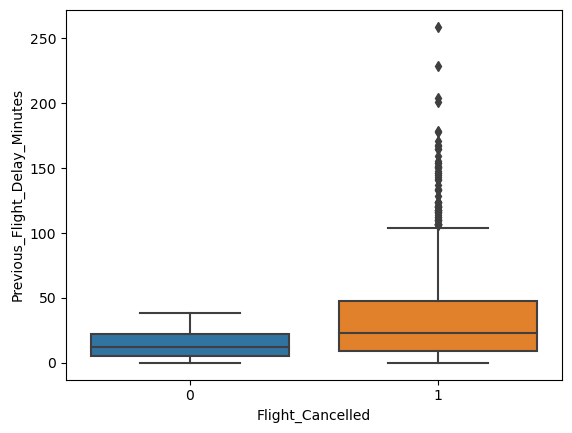

In [7]:
sns.boxplot(x="Flight_Cancelled", y="Previous_Flight_Delay_Minutes", data=df)

Outliers present.

In [8]:
# handling outliers using RobustScaler
from sklearn.preprocessing import RobustScaler

# Separate features and target variable
X = df.drop(columns=['Flight_Cancelled','Airline','Origin_Airport','Destination_Airport','Airplane_Type'])  # Features
y = df[['Flight_Cancelled','Airline','Origin_Airport','Destination_Airport','Airplane_Type']]  

# Apply RobustScaler only to the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=['float64', 'int64','uint8']).columns)

df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
df.head()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,Airline,Origin_Airport,Destination_Airport,Airplane_Type
0,0.454577,-0.162963,-0.727273,0.50,-0.833333,-0.596128,-0.419355,0.010424,-0.079221,0,Airline D,Airport 3,Airport 2,Type C
1,-0.056889,0.303704,0.000000,-0.75,0.000000,-0.926796,1.612903,-0.216140,-0.708429,1,Airline E,Airport 5,Airport 4,Type B
2,-0.421185,0.503704,0.454545,-0.25,0.500000,-0.859421,0.000000,0.937271,-0.516020,0,Airline C,Airport 1,Airport 2,Type C
3,-0.172610,1.192593,-1.000000,-0.75,0.333333,0.270052,-0.161290,-0.463596,-0.025958,1,Airline E,Airport 5,Airport 3,Type B
4,-0.568646,0.511111,0.636364,0.75,1.000000,-0.034053,-0.451613,0.690382,-0.986048,0,Airline E,Airport 2,Airport 2,Type E


In [9]:
# check the data types
print(df.dtypes)

Flight ID                        float64
Flight_Distance                  float64
Scheduled_Departure_Time         float64
Day_of_Week                      float64
Month                            float64
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
Airline                           object
Origin_Airport                    object
Destination_Airport               object
Airplane_Type                     object
dtype: object


Every Column has a correct data type.

## Task: Exploratory Data Analysis (EDA)
In preparation for building a robust predictive model, it is crucial to begin with an Exploratory Data Analysis (EDA) of the dataset. EDA serves as the foundation of data-driven modeling, allowing us to uncover patterns, detect anomalies, and understand the relationships between features. Through this analysis, we will gain valuable insights into the data's structure and distribution, which will inform the selection and engineering of features, ultimately leading to more accurate and reliable predictions. This task involves generating descriptive statistics, visualizing data distributions, and exploring how features interact with each other and the target variable.

In [10]:
df.shape

(3000, 14)

In [11]:
# descriptive statistics
df.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000
mean,-0.015312,0.014143,-0.051364,-0.009250,0.063500,3.698131e-03,0.283658,0.078437,-2.557573e-03,0.690667
std,0.580394,0.732535,0.627209,0.504087,0.578996,5.833576e-01,0.899185,0.587948,5.859054e-01,0.462296
min,-1.025842,-2.659259,-1.090909,-0.750000,-0.833333,-1.045961e+00,-0.580645,-0.874084,-1.022908e+00,0.000000
25%,-0.516578,-0.488889,-0.545455,-0.500000,-0.500000,-4.899925e-01,-0.354839,-0.424899,-4.982030e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.113476e-16,0.000000,0.000000,1.100152e-16,1.000000
75%,0.483422,0.511111,0.454545,0.500000,0.500000,5.100075e-01,0.645161,0.575101,5.017970e-01,1.000000
max,0.996803,2.718519,1.000000,0.750000,1.000000,1.158041e+00,7.774194,1.258783,1.201767e+00,1.000000


In [12]:
df.Flight_Cancelled.value_counts()

1    2072
0     928
Name: Flight_Cancelled, dtype: int64

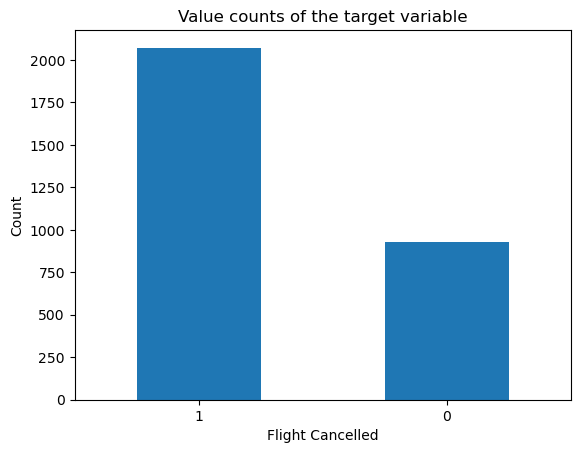

In [13]:
df.Flight_Cancelled.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Flight Cancelled")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

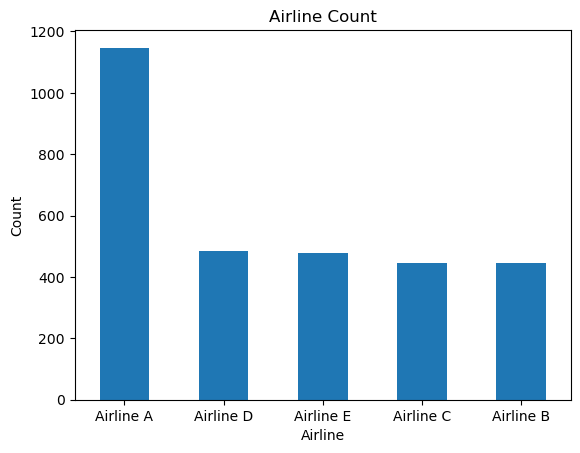

In [14]:
df.Airline.value_counts().plot(kind="bar")
plt.title("Airline Count")
plt.xlabel("Airline")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

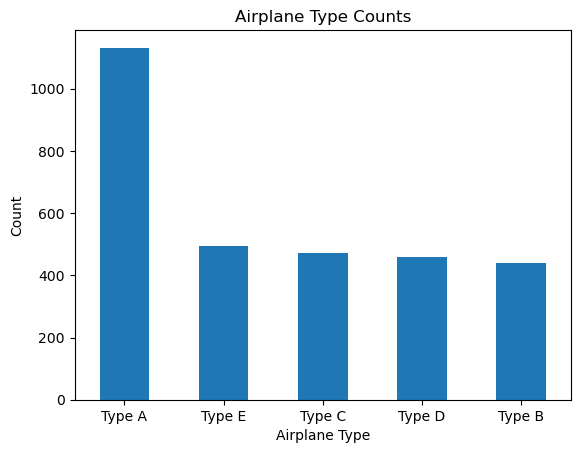

In [15]:
df.Airplane_Type.value_counts().plot(kind="bar")
plt.title("Airplane Type Counts")
plt.xlabel("Airplane Type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

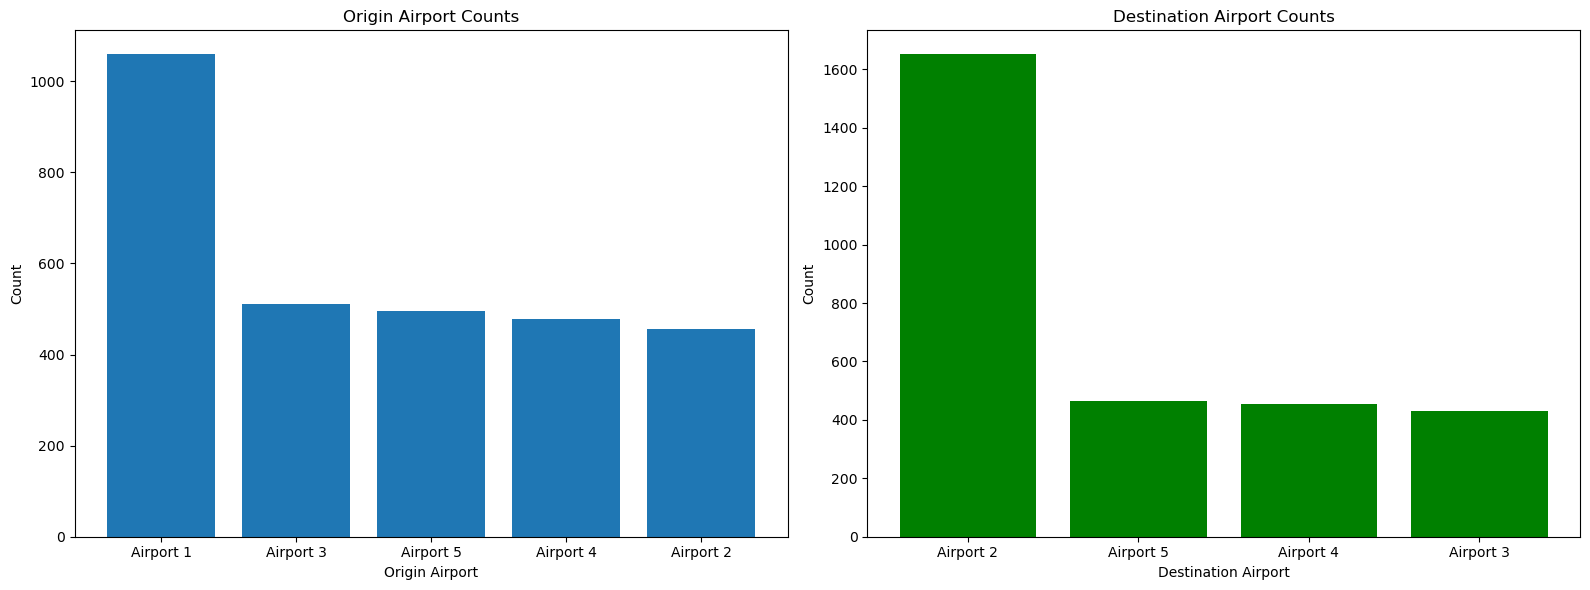

In [16]:
destination_counts = df['Destination_Airport'].value_counts()
origin_counts = df['Origin_Airport'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Origin Airport counts
axes[0].bar(origin_counts.index, origin_counts.values)
axes[0].set_title('Origin Airport Counts')
axes[0].set_xlabel('Origin Airport')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Plot Destination Airport counts
axes[1].bar(destination_counts.index, destination_counts.values, color='green')
axes[1].set_title('Destination Airport Counts')
axes[1].set_xlabel('Destination Airport')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [17]:
df.corr()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
Flight ID,1.000000,-0.007541,0.006207,-0.012384,-0.025743,-0.002007,0.006172,0.043170,0.009312,-0.009101
Flight_Distance,-0.007541,1.000000,0.039727,0.024455,0.019573,0.010139,0.018413,0.042128,-0.018627,-0.277471
Scheduled_Departure_Time,0.006207,0.039727,1.000000,-0.011834,0.018319,-0.023682,-0.036318,0.040739,0.046556,-0.043733
Day_of_Week,-0.012384,0.024455,-0.011834,1.000000,-0.016790,0.020231,0.010572,0.001148,-0.011712,-0.008705
Month,-0.025743,0.019573,0.018319,-0.016790,1.000000,-0.011544,-0.006402,0.038264,-0.003430,-0.004242
Weather_Score,-0.002007,0.010139,-0.023682,0.020231,-0.011544,1.000000,-0.043096,-0.064427,-0.005269,0.305762
Previous_Flight_Delay_Minutes,0.006172,0.018413,-0.036318,0.010572,-0.006402,-0.043096,1.000000,-0.036031,-0.069502,0.302805
Airline_Rating,0.043170,0.042128,0.040739,0.001148,0.038264,-0.064427,-0.036031,1.000000,-0.021431,-0.314099
Passenger_Load,0.009312,-0.018627,0.046556,-0.011712,-0.003430,-0.005269,-0.069502,-0.021431,1.000000,-0.008320
Flight_Cancelled,-0.009101,-0.277471,-0.043733,-0.008705,-0.004242,0.305762,0.302805,-0.314099,-0.008320,1.000000


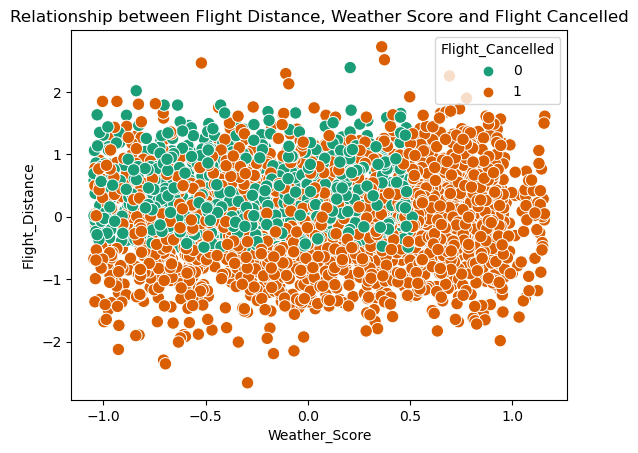

In [18]:
sns.scatterplot(x="Weather_Score", y="Flight_Distance", hue="Flight_Cancelled", data=df, palette="Dark2", s=80)
plt.title("Relationship between Flight Distance, Weather Score and Flight Cancelled")
plt.show()

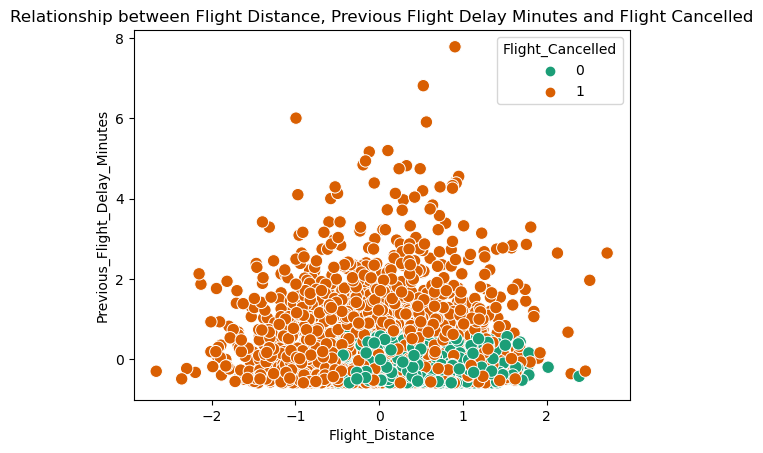

In [19]:
sns.scatterplot(x="Flight_Distance", y="Previous_Flight_Delay_Minutes", hue="Flight_Cancelled", data=df, palette="Dark2", s=80)
plt.title("Relationship between Flight Distance, Previous Flight Delay Minutes and Flight Cancelled")
plt.show()

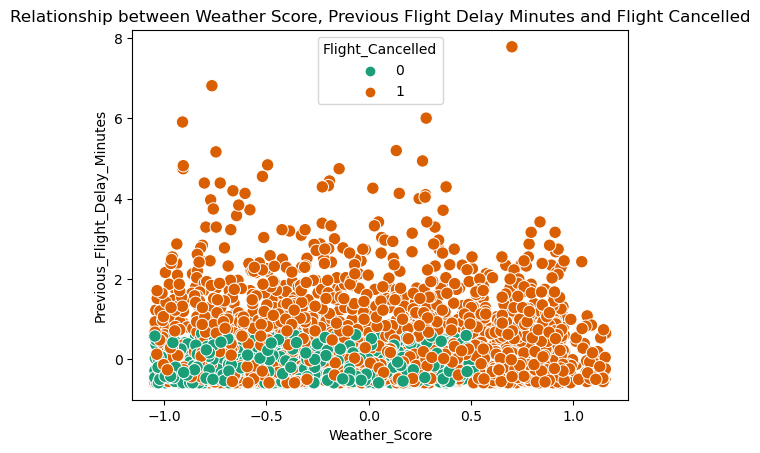

In [20]:
sns.scatterplot(x="Weather_Score", y="Previous_Flight_Delay_Minutes", hue="Flight_Cancelled", data=df, palette="Dark2", s=80)
plt.title("Relationship between Weather Score, Previous Flight Delay Minutes and Flight Cancelled")
plt.show()

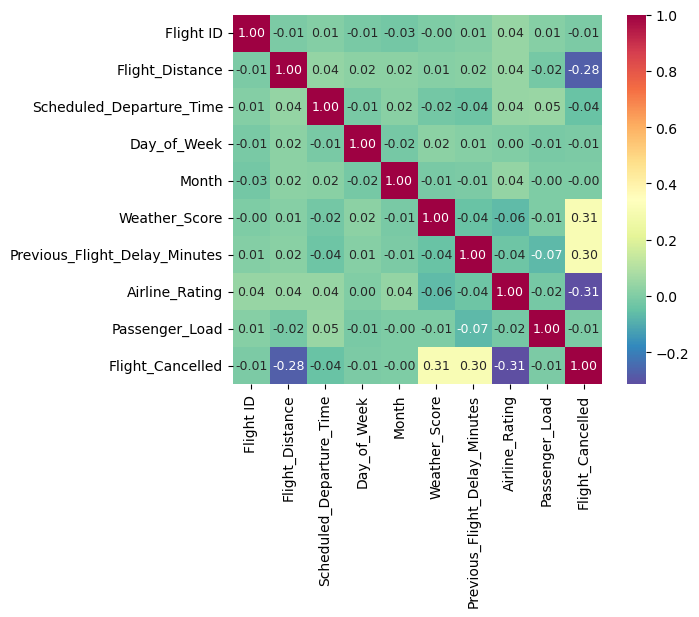

In [21]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 9}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns, 
                 cmap="Spectral_r")
plt.show()

## Task: Preprocessing and Model Building
In this task, we have to predict flight cancellation utilizing Logistic Regression algorithm. The data will be separated into training and testing sets and the categorical data will be transformed in a form that is usable in the model. Feature scaling will be used to make all features scale on the same level thus improve model accuracy. After the preprocessing step is done we will create the Logistic Regression model on the training data and then assess the performance of the model on the test data set using suitable measures of performance.

In [22]:
df.shape

(3000, 14)

In [23]:
# encoding categorical variables
df = pd.get_dummies(df, columns=['Airline','Origin_Airport','Destination_Airport','Airplane_Type'])
df.head()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,...,Origin_Airport_Airport 5,Destination_Airport_Airport 2,Destination_Airport_Airport 3,Destination_Airport_Airport 4,Destination_Airport_Airport 5,Airplane_Type_Type A,Airplane_Type_Type B,Airplane_Type_Type C,Airplane_Type_Type D,Airplane_Type_Type E
0,0.454577,-0.162963,-0.727273,0.50,-0.833333,-0.596128,-0.419355,0.010424,-0.079221,0,...,0,1,0,0,0,0,0,1,0,0
1,-0.056889,0.303704,0.000000,-0.75,0.000000,-0.926796,1.612903,-0.216140,-0.708429,1,...,1,0,0,1,0,0,1,0,0,0
2,-0.421185,0.503704,0.454545,-0.25,0.500000,-0.859421,0.000000,0.937271,-0.516020,0,...,0,1,0,0,0,0,0,1,0,0
3,-0.172610,1.192593,-1.000000,-0.75,0.333333,0.270052,-0.161290,-0.463596,-0.025958,1,...,1,0,1,0,0,0,1,0,0,0
4,-0.568646,0.511111,0.636364,0.75,1.000000,-0.034053,-0.451613,0.690382,-0.986048,0,...,0,1,0,0,0,0,0,0,0,1


In [24]:
# create Independent & dep variable
y_data = df['Flight_Cancelled']
x_data = df.drop('Flight_Cancelled', axis=1)

In [25]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
# print the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 28)
(600, 28)
(2400,)
(600,)


In [26]:
range_per_column = df.max() - df.min()

# Display the range for each column
print(range_per_column)

Flight ID                        2.022645
Flight_Distance                  5.377778
Scheduled_Departure_Time         2.090909
Day_of_Week                      1.500000
Month                            1.833333
Weather_Score                    2.204002
Previous_Flight_Delay_Minutes    8.354839
Airline_Rating                   2.132868
Passenger_Load                   2.224675
Flight_Cancelled                 1.000000
Airline_Airline A                1.000000
Airline_Airline B                1.000000
Airline_Airline C                1.000000
Airline_Airline D                1.000000
Airline_Airline E                1.000000
Origin_Airport_Airport 1         1.000000
Origin_Airport_Airport 2         1.000000
Origin_Airport_Airport 3         1.000000
Origin_Airport_Airport 4         1.000000
Origin_Airport_Airport 5         1.000000
Destination_Airport_Airport 2    1.000000
Destination_Airport_Airport 3    1.000000
Destination_Airport_Airport 4    1.000000
Destination_Airport_Airport 5    1

In [27]:
from sklearn.linear_model import LogisticRegression
import time
lr=LogisticRegression()

In [28]:
# training
start_time = time.time()
lr.fit(X_train,y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

Training time: 0.0289 seconds


In [29]:
# prediction
start_time = time.time()
y_pred=lr.predict(X_test)
predict_time = time.time() - start_time
print(f"Prediction time: {predict_time:.4f} seconds")

Prediction time: 0.0030 seconds


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[115  72]
 [ 46 367]]


In [31]:
print('Accuracy of logistic Regression model',accuracy_score(y_test,y_pred))

Accuracy of logistic Regression model 0.8033333333333333


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       187
           1       0.84      0.89      0.86       413

    accuracy                           0.80       600
   macro avg       0.78      0.75      0.76       600
weighted avg       0.80      0.80      0.80       600



## Task: Build Other Classification Models

### 1. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
# Training
start_time = time.time()
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

Training time: 0.0289 seconds


In [35]:
# Prediction
start_time = time.time()
y_pred = classifier.predict(X_test)
predict_time = time.time() - start_time
print(f"Prediction time: {predict_time:.4f} seconds")

Prediction time: 0.0040 seconds


In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 95.67%
Confusion Matrix:
[[169  18]
 [  8 405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       187
           1       0.96      0.98      0.97       413

    accuracy                           0.96       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.96      0.96      0.96       600



### 2. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Training
start_time = time.time()
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

Training time: 0.5316 seconds


In [39]:
# Prediction
start_time = time.time()
y_pred = classifier.predict(X_test)
predict_time = time.time() - start_time
print(f"Prediction time: {predict_time:.4f} seconds")

Prediction time: 0.0329 seconds


In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 98.67%
Confusion Matrix:
[[187   0]
 [  8 405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       187
           1       1.00      0.98      0.99       413

    accuracy                           0.99       600
   macro avg       0.98      0.99      0.98       600
weighted avg       0.99      0.99      0.99       600



### 3. Model Comparison

#### Accuracy: 
Random Forest (99%) > Decision Tree (96%) > Logistic Regression (80%).

#### Precision:
Random Forest and Decision Tree both have very high precision, with Random Forest having perfect precision for class 1.
Logistic Regression performs lower in precision for both classes.

#### Recall:
Random Forest has perfect recall for Class 0 and near-perfect for Class 1.
Decision Tree has slightly lower recall for Class 0 but still strong.
Logistic Regression shows poor recall for Class 0.

#### F1-Score:
Random Forest leads with the highest F1-scores for both classes.
Decision Tree follows with strong F1-scores, though slightly lower than Random Forest.
Logistic Regression has significantly lower F1-scores.

#### Conclusion:
Random Forest is the best model overall, with the highest scores across all key metrics (accuracy, precision, recall, F1-score).

Decision Tree performs reasonably well, especially for interpretability, complexity, and computation requirements, but it falls slightly behind Random Forest in terms of overall performance.

Logistic Regression performs the weakest, particularly in recall and F1-score for Class 0, which suggests it's not as well-suited for this dataset.